In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns   
#스케일러
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler

In [ ]:
#그래프에서 한글 꺠짐 해결
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic') 

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DACON/IRIS/data/iris_train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DACON/IRIS/data/iris_test.csv')

submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DACON/IRIS/data/sample_submission.csv')

#데이터 모든 열을 출력하는 코드
pd.set_option('display.max_rows', None)

#1. iris_train.csv : 학습 데이터

id: 데이터 고유 id

species: 붓꽃의 종류 (versicolor, setosa, virginica 중 하나)

sepal length (cm) : 붓꽃의 꽃받침의 길이

petal length (cm) : 붓꽃의 꽃잎의 길이

sepal width (cm) : 붓꽃의 꽃받침의 너비

petal width (cm) : 붓꽃의 꽃잎의 너비


#2. test.csv : 테스트 데이터

id: 데이터 고유 id

species: 붓꽃의 종류 (versicolor, setosa, virginica 중 하나)

sepal length (cm) : 붓꽃의 꽃받침의 길이

petal length (cm) : 붓꽃의 꽃잎의 길이



#3. sample_submissoin.csv : 제출 양식

id: 데이터 고유 id

sepal width (cm) : 붓꽃의 꽃받침의 너비

petal width (cm) : 붓꽃의 꽃잎의 너비


In [ ]:
train.head()


,id,species,sepal length (cm),petal length (cm),sepal width (cm),petal width (cm)
0,0,setosa,4.4,1.4,2.9,0.2
1,1,versicolor,6.4,4.5,3.2,1.5
2,2,virginica,6.2,4.8,2.8,1.8
3,3,virginica,7.2,6.1,3.6,2.5
4,4,setosa,4.9,1.4,3.0,0.2


In [ ]:
test.head()


,id,species,sepal length (cm),petal length (cm)
0,0,setosa,5.4,1.7
1,1,setosa,5.7,1.5
2,2,setosa,5.3,1.5
3,3,setosa,5.1,1.9
4,4,virginica,6.0,4.8


In [ ]:
# train 데이터 결측치 확인
train.isna().sum()

id                   0
species              0
sepal length (cm)    0
petal length (cm)    0
sepal width (cm)     0
petal width (cm)     0
dtype: int64

In [ ]:
# test 데이터 결측치 확인
test.isna().sum()

id                   0
species              0
sepal length (cm)    0
petal length (cm)    0
dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 75 non-null     int64  
 1   species            75 non-null     object 
 2   sepal length (cm)  75 non-null     float64
 3   petal length (cm)  75 non-null     float64
 4   sepal width (cm)   75 non-null     float64
 5   petal width (cm)   75 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 3.6+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 75 non-null     int64  
 1   species            75 non-null     object 
 2   sepal length (cm)  75 non-null     float64
 3   petal length (cm)  75 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.5+ KB


In [ ]:
# 학습에 사용할 컬럼과 타겟 컬럼을 선정
features = ['species','sepal length (cm)','petal length (cm)'] 
target = ['sepal width (cm)','petal width (cm)']

In [ ]:
X_train , X_test, y_train = train[features],test[features],train[target]

In [ ]:
# 품종을 label화 하되, 품종간의 영향을 없애기 위해 one-hot encoding 방식을 채택
X_train = pd.get_dummies(data = X_train, columns = ['species'], prefix = 'species')
X_test = pd.get_dummies(data = X_test, columns = ['species'], prefix = 'species')

In [ ]:
X_train.head()

,sepal length (cm),petal length (cm),species_setosa,species_versicolor,species_virginica
0,4.4,1.4,1,0,0
1,6.4,4.5,0,1,0
2,6.2,4.8,0,0,1
3,7.2,6.1,0,0,1
4,4.9,1.4,1,0,0


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45936 missing from current font.
  font.set_text(

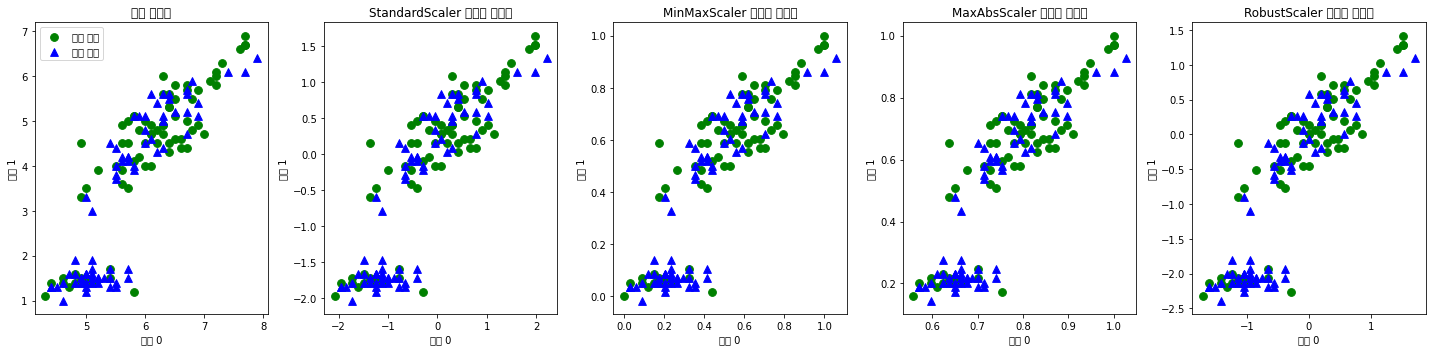

In [ ]:
# 훈련 세트와 테스트 세트의 산점도를 그립니다
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
axes[0].scatter(X_train.to_numpy()[:, 0], X_train.to_numpy()[:, 1],
                c= 'green', label="훈련 세트", s=60)
axes[0].scatter(X_test.to_numpy()[:, 0], X_test.to_numpy()[:, 1], marker='^',
                c= 'blue', label="훈련 세트", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("원본 데이터")

# StandardScaler 사용해 스케일을 조정합니다
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled1 = scaler.transform(X_train)
X_test_scaled1 = scaler.transform(X_test)

# 스케일이 조정된 데이터의 산점도를 그립니다
axes[1].scatter(X_train_scaled1[:, 0], X_train_scaled1[:, 1],
                c= 'green', label="훈련 세트", s=60)
axes[1].scatter(X_test_scaled1[:, 0], X_test_scaled1[:, 1], marker='^',
                c='blue', label="테스트 세트", s=60)
axes[1].set_title("StandardScaler 조정된 데이터")


# MinMaxScaler를 사용해 스케일을 조정합니다
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled2 = scaler.transform(X_train)
X_test_scaled2 = scaler.transform(X_test)

# 스케일이 조정된 데이터의 산점도를 그립니다
axes[2].scatter(X_train_scaled2[:, 0], X_train_scaled2[:, 1],
                c= 'green', label="훈련 세트", s=60)
axes[2].scatter(X_test_scaled2[:, 0], X_test_scaled2[:, 1], marker='^',
                c='blue', label="테스트 세트", s=60)
axes[2].set_title("MinMaxScaler 조정된 데이터")



# MaxAbsScaler 사용해 스케일을 조정합니다
scaler = MaxAbsScaler()
scaler.fit(X_train)
X_train_scaled3 = scaler.transform(X_train)
X_test_scaled3 = scaler.transform(X_test)

# 스케일이 조정된 데이터의 산점도를 그립니다
axes[3].scatter(X_train_scaled3[:, 0], X_train_scaled3[:, 1],
                c= 'green', label="훈련 세트", s=60)
axes[3].scatter(X_test_scaled3[:, 0], X_test_scaled3[:, 1], marker='^',
                c='blue', label="테스트 세트", s=60)
axes[3].set_title("MaxAbsScaler 조정된 데이터")





# RobustScaler 사용해 스케일을 조정합니다
scaler = RobustScaler()
scaler.fit(X_train)
X_train_scaled4 = scaler.transform(X_train)
X_test_scaled4 = scaler.transform(X_test)

# 스케일이 조정된 데이터의 산점도를 그립니다
axes[4].scatter(X_train_scaled4[:, 0], X_train_scaled4[:, 1],
                c= 'green', label="훈련 세트", s=60)
axes[4].scatter(X_test_scaled4[:, 0], X_test_scaled4[:, 1], marker='^',
                c='blue', label="테스트 세트", s=60)
axes[4].set_title("RobustScaler 조정된 데이터")



for ax in axes:
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
fig.tight_layout()

In [ ]:
# Robust 사용
X_train_scaled3.shape

(75, 5)

In [ ]:
from sklearn.model_selection import KFold
k_fold = KFold(n_splits=5,shuffle=True, random_state=99)
# 하이퍼파라미터 (커널스케일, 박스컨스트레인트 등 모델파라미터를 의미) 의 최적값을 찾음
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(X_train_scaled3, y_train) 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
from sklearn.model_selection import KFold 
from sklearn.metrics import mean_squared_error
import numpy as np
kfold = KFold(n_splits=10)
num_iter = 0 
cv_acc = [] 
for train_idx, test_idx in kfold.split(X_train_scaled3):
   X_train1, X_test1 = pd.DataFrame(X_train_scaled3).iloc[train_idx, :], pd.DataFrame(X_train_scaled3).iloc[test_idx, :] 
   y_train1, y_test1 = y_train.iloc[train_idx], y_train.iloc[test_idx] 
   mlr.fit(X_train1, y_train1) 
   y_pred1 = mlr.predict(X_test1) 
   num_iter = num_iter + 1 
   print("======================================================================")
   acc = mean_squared_error((y_test1.to_numpy()[:,0]), (y_pred1[:,0]))
   print("sepal width {}번 검증 셋 정확도 : {} ".format(num_iter, acc))
   cv_acc.append(acc) 
   print("sepal width  mean of accuracy : {} ".format(round(np.mean(cv_acc),7)))
   print("@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@")
   acc = mean_squared_error((y_test1.to_numpy()[:,1]), (y_pred1[:,1]))
   print("petal width {}번 검증 셋 정확도 : {} ".format(num_iter, acc))
   cv_acc.append(acc) 
   print("petal width  mean of accuracy : {} ".format(round(np.mean(cv_acc),7)))
   print("======================================================================")

sepal width 1번 검증 셋 정확도 : 0.09254172313438011 
sepal width  mean of accuracy : 0.0925417 
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
petal width 1번 검증 셋 정확도 : 0.03569464246675952 
petal width  mean of accuracy : 0.0641182 
sepal width 2번 검증 셋 정확도 : 0.09432576740824616 
sepal width  mean of accuracy : 0.0741874 
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
petal width 2번 검증 셋 정확도 : 0.017057649022049075 
petal width  mean of accuracy : 0.0599049 
sepal width 3번 검증 셋 정확도 : 0.1611033549283381 
sepal width  mean of accuracy : 0.0801446 
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
petal width 3번 검증 셋 정확도 : 0.026053754790367162 
petal width  mean of accuracy : 0.0711295 
sepal width 4번 검증 셋 정확도 : 0.0524269841889515 
sepal width  mean of accuracy : 0.0684577 
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
petal width 4번 검증 셋 정확도 : 0.03349914256919135 
petal width  mean of accuracy : 0.0640879 
sepal width 5번 검증 셋 정확도 : 0.10999563557433263 
sepal width  mean of accuracy : 0.0691887 
@@@@@@@@@@@@@@

In [ ]:
y_predict = mlr.predict(X_test_scaled3)

In [ ]:

print(mlr.coef_)

[[ 2.60225066 -0.22267442  0.55556324 -0.27373191 -0.28183133]
 [-0.7509195   2.12416549 -0.34769263  0.01690061  0.33079202]]


In [ ]:

print(mlr.coef_)

[[ 2.60225066 -0.22267442  0.55556324 -0.27373191 -0.28183133]
 [-0.7509195   2.12416549 -0.34769263  0.01690061  0.33079202]]


In [ ]:
y_predict

array([[3.50210186, 0.23873731],
       [3.60994258, 0.14791069],
       [3.47476073, 0.18691949],
       [3.39426114, 0.32956393],
       [2.76743794, 1.81304397],
       [2.69016551, 1.92490339],
       [3.50855619, 0.17716729],
       [3.3766015 , 0.18539109],
       [3.33957887, 0.2259283 ],
       [2.78521885, 1.40679753],
       [3.34280604, 0.19514329],
       [3.30901057, 0.20489549],
       [2.85914283, 1.87614239],
       [3.35791709, 2.12031226],
       [2.65971849, 1.35345132],
       [2.86236999, 1.84535738],
       [3.24141965, 0.2243999 ],
       [3.06191561, 1.81762918],
       [2.81578715, 1.42783034],
       [2.77541607, 2.04957183],
       [2.87680246, 2.02031522],
       [3.29287475, 0.35882053],
       [2.69674112, 1.31291411],
       [3.40394263, 0.2372089 ],
       [2.64205886, 1.20927848],
       [3.30255624, 0.26646551],
       [3.40071547, 0.26799391],
       [3.44419243, 0.16588669],
       [3.51501052, 0.11559728],
       [3.05223411, 1.9099842 ],
       [2.

In [ ]:
lrIris = submission.copy()
lrIris[['sepal width (cm)','petal width (cm)']] = mlr.predict(X_test_scaled3)
lrIris[['sepal width (cm)','petal width (cm)']] 

In [ ]:

#lrIris.to_csv('lr_20211027_4.csv',index=False)

In [ ]:

# MLP 모델 아키텍처 정의

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
def build_model(num_input=1):
    model = Sequential()
    model.add(Dense(2048, activation='relu'))
    model.add(Dense(1024, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='linear'))
    
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse', metrics=['mse'])
    
    return model



3/3 [==============================] - 0s 11ms/step - loss: 0.0879 - mse: 0.0879
Epoch 1/20000
4/4 - 1s - loss: 8.6750 - mse: 8.6750 - val_loss: 8.2065 - val_mse: 8.2065
Epoch 2/20000
4/4 - 0s - loss: 8.1396 - mse: 8.1396 - val_loss: 7.6272 - val_mse: 7.6272
Epoch 3/20000
4/4 - 0s - loss: 7.4798 - mse: 7.4798 - val_loss: 6.7884 - val_mse: 6.7884
Epoch 4/20000
4/4 - 0s - loss: 6.5351 - mse: 6.5351 - val_loss: 5.6096 - val_mse: 5.6096
Epoch 5/20000
4/4 - 0s - loss: 5.2347 - mse: 5.2347 - val_loss: 4.1118 - val_mse: 4.1118
Epoch 6/20000
4/4 - 0s - loss: 3.6227 - mse: 3.6227 - val_loss: 2.4017 - val_mse: 2.4017
Epoch 7/20000
4/4 - 0s - loss: 1.8690 - mse: 1.8690 - val_loss: 0.8679 - val_mse: 0.8679
Epoch 8/20000
4/4 - 0s - loss: 0.5804 - mse: 0.5804 - val_loss: 0.2447 - val_mse: 0.2447
Epoch 9/20000
4/4 - 0s - loss: 0.3950 - mse: 0.3950 - val_loss: 0.5672 - val_mse: 0.5672
Epoch 10/20000
4/4 - 0s - loss: 0.7000 - mse: 0.7000 - val_loss: 0.4351 - val_mse: 0.4351
Epoch 11/20000
4/4 - 0s - lo

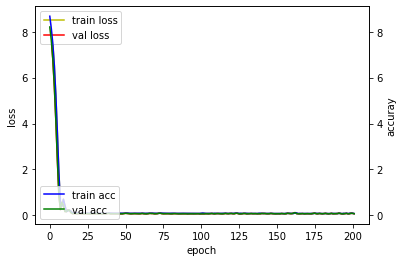

'\n#Epoch 1000/1000\n#3/3 - 0s - loss: 0.0755 - mse: 0.0755 - val_loss: 0.0743 - val_mse: 0.0743\n\n#Epoch 215/500\n#3/3 - 0s - loss: 0.0855 - mse: 0.0855 - val_loss: 0.0651 - val_mse: 0.0651\n#Epoch 216/500\n#3/3 - 0s - loss: 0.0850 - mse: 0.0850 - val_loss: 0.0650 - val_mse: 0.0650\n\nEpoch 1195/2000\n3/3 - 0s - loss: 0.0582 - mse: 0.0582 - val_loss: 0.0771 - val_mse: 0.0771\nEpoch 1196/2000\n3/3 - 0s - loss: 0.0598 - mse: 0.0598 - val_loss: 0.0761 - val_mse: 0.0761\nEpoch 1197/2000\n3/3 - 0s - loss: 0.0583 - mse: 0.0583 - val_loss: 0.0774 - val_mse: 0.0774\n\n'

In [ ]:


# 모델 평가
model.evaluate(X_train_scaled3, y_train['sepal width (cm)'])

# 교차 검증
early_stopping = EarlyStopping(monitor='val_loss',  patience=100)
""" monitor : 관찰하고자 하는 항목입니다. ‘val_loss’나 ‘val_acc’가 주로 사용됩니다.
min_delta : 개선되고 있다고 판단하기 위한 최소 변화량을 나타냅니다. 만약 변화량이 min_delta보다 적은 경우에는 개선이 없다고 판단합니다.
patience : 개선이 없다고 바로 종료하지 않고 개선이 없는 에포크를 얼마나 기다려 줄 것인 가를 지정합니다. 만약 10이라고 지정하면 개선이 없는 에포크가 10번째 지속될 경우 학습일 종료합니다.
verbose : 얼마나 자세하게 정보를 표시할 것인가를 지정합니다. (0, 1, 2)
mode : 관찰 항목에 대해 개선이 없다고 판단하기 위한 기준을 지정합니다. 예를 들어 관찰 항목이 ‘val_loss’인 경우에는 감소되는 것이 멈출 때 종료되어야 하므로, ‘min’으로 설정됩니다.
auto : 관찰하는 이름에 따라 자동으로 지정합니다.
min : 관찰하고 있는 항목이 감소되는 것을 멈출 때 종료합니다.
max : 관찰하고 있는 항목이 증가되는 것을 멈출 때 종료합니다."""


model = build_model(num_input=5)
history = model.fit(X_train_scaled3, y_train['sepal width (cm)'], batch_size=15, epochs=20000, validation_split=0.35, verbose=2,callbacks=[early_stopping])

%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')

acc_ax.plot(history.history['mse'], 'b', label='train acc')
acc_ax.plot(history.history['val_mse'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

"""
#Epoch 1000/1000
#3/3 - 0s - loss: 0.0755 - mse: 0.0755 - val_loss: 0.0743 - val_mse: 0.0743

#Epoch 215/500
#3/3 - 0s - loss: 0.0855 - mse: 0.0855 - val_loss: 0.0651 - val_mse: 0.0651
#Epoch 216/500
#3/3 - 0s - loss: 0.0850 - mse: 0.0850 - val_loss: 0.0650 - val_mse: 0.0650

Epoch 1195/2000
3/3 - 0s - loss: 0.0582 - mse: 0.0582 - val_loss: 0.0771 - val_mse: 0.0771
Epoch 1196/2000
3/3 - 0s - loss: 0.0598 - mse: 0.0598 - val_loss: 0.0761 - val_mse: 0.0761
Epoch 1197/2000
3/3 - 0s - loss: 0.0583 - mse: 0.0583 - val_loss: 0.0774 - val_mse: 0.0774

"""

In [ ]:
lrIris = submission.copy()
lrIris['sepal width (cm)']=model.predict(X_test_scaled3)

3/3 [==============================] - 0s 10ms/step - loss: 3.3660 - mse: 3.3660
Epoch 1/20000
3/3 - 1s - loss: 2.4514 - mse: 2.4514 - val_loss: 2.1801 - val_mse: 2.1801
Epoch 2/20000
3/3 - 0s - loss: 2.3871 - mse: 2.3871 - val_loss: 2.0960 - val_mse: 2.0960
Epoch 3/20000
3/3 - 0s - loss: 2.2872 - mse: 2.2872 - val_loss: 1.9876 - val_mse: 1.9876
Epoch 4/20000
3/3 - 0s - loss: 2.1676 - mse: 2.1676 - val_loss: 1.8670 - val_mse: 1.8670
Epoch 5/20000
3/3 - 0s - loss: 2.0335 - mse: 2.0335 - val_loss: 1.7167 - val_mse: 1.7167
Epoch 6/20000
3/3 - 0s - loss: 1.8524 - mse: 1.8524 - val_loss: 1.5346 - val_mse: 1.5346
Epoch 7/20000
3/3 - 0s - loss: 1.6395 - mse: 1.6395 - val_loss: 1.3109 - val_mse: 1.3109
Epoch 8/20000
3/3 - 0s - loss: 1.3909 - mse: 1.3909 - val_loss: 1.0487 - val_mse: 1.0487
Epoch 9/20000
3/3 - 0s - loss: 1.0757 - mse: 1.0757 - val_loss: 0.7665 - val_mse: 0.7665
Epoch 10/20000
3/3 - 0s - loss: 0.7686 - mse: 0.7686 - val_loss: 0.4902 - val_mse: 0.4902
Epoch 11/20000
3/3 - 0s - lo

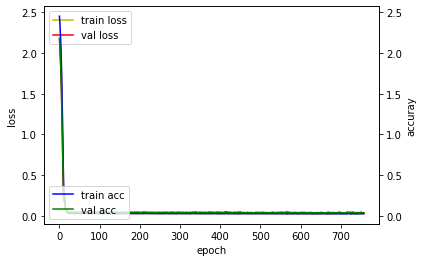

In [ ]:

# 모델 평가
model.evaluate(X_train_scaled3, y_train['petal width (cm)'])

# 교차 검증
model = build_model(num_input=5)
history = model.fit(X_train_scaled3, y_train['petal width (cm)'], batch_size=20, epochs=20000, validation_split=0.35, verbose=2,callbacks=[early_stopping])

%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')

acc_ax.plot(history.history['mse'], 'b', label='train acc')
acc_ax.plot(history.history['val_mse'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()
#Epoch 1000/1000
#3/3 - 0s - loss: 0.0288 - mse: 0.0288 - val_loss: 0.0434 - val_mse: 0.0434

In [ ]:
lrIris['petal width (cm)']=model.predict(X_test_scaled3)

In [ ]:
lrIris
lrIris.to_csv('lr_20211027_6.csv',index=False)